# CYCLOPS on Mouse Liver Data (Boxplot: PCA)

## 1. Importing packages

In [1]:
from cyclops_v2 import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Loading data

#### Read the Mouse Liver data into a pandas dataframe:

In [2]:
df = pd.read_csv("mouseLiver.csv").T
df = df.iloc[1:,:]

In [3]:
ng = df.shape[1]
nc = df.shape[0]
print("Running on {} genes and {} cells.".format(ng,nc))

Running on 14312 genes and 48 cells.


Filter genes in the top 10% variance:

In [4]:
frac = 0.10

df_std = pd.DataFrame(df.std().sort_values(ascending=False))
df_std = df_std.iloc[:round(df_std.shape[0]*frac),:]
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 4414 to 48
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1431 non-null   float64
dtypes: float64(1)
memory usage: 22.4 KB


In [5]:
gene_list = df_std.index.to_numpy()

In [6]:
data = df.to_numpy().T

newdata = np.zeros([len(gene_list),nc])
for i in range(len(gene_list)):
    newdata[i] = data[gene_list[i]]
newdata = pd.DataFrame(newdata.T)
newdata.shape

(48, 1431)

## 3. Data Preprocessing

### PCA (without scaling)

Center the data to zero mean, without scaling to unit variance:

In [7]:
df_cent = newdata.transform(lambda x: x-x.mean())
df_cent.head()

,0,1,2,3,4,5,6,7,8,9,...,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430
0,-1.074904,-1.346862,-0.435143,0.581335,0.291266,-0.404934,-0.572699,-0.080760,-0.366932,0.833576,...,0.192984,0.016707,-0.168378,0.126847,0.111669,0.021330,-0.269509,0.289797,0.158908,-0.112113
1,-1.325239,-1.478688,-0.945180,-0.105732,0.199204,-0.312123,-0.350296,-0.312390,-0.287158,0.804969,...,0.063094,0.154394,-0.129119,0.318367,0.104156,0.091646,-0.010063,0.500482,0.177918,-0.111686
2,-1.467395,-1.152329,-0.665212,0.202131,0.111784,-0.396584,-0.252562,0.372546,-0.382673,0.879127,...,0.197245,0.186623,-0.117351,0.115919,0.038757,-0.006018,-0.001137,0.360755,0.029727,0.083421
3,-1.796292,-1.381943,-0.281816,-0.385229,-0.180603,-0.444568,-0.191849,-0.311879,-0.344652,0.879681,...,0.168560,-0.093592,-0.012391,0.133560,0.207740,-0.030000,0.427969,0.259766,-0.067842,0.014793
4,-1.986607,-1.288099,-1.167620,-1.071924,-0.228164,-0.524226,-0.173404,-0.820587,-0.269711,0.805292,...,0.370957,0.061670,0.112919,0.165661,0.456097,-0.001966,0.271655,0.373738,0.194568,-0.249469


Perform PCA:

In [8]:
from sklearn.decomposition import PCA
pca_model = PCA()
pca_comp = pca_model.fit_transform(df_cent)
pca_load = pca_model.components_

In [9]:
pca_comp.shape, pca_load.shape

((48, 48), (48, 1431))

In [10]:
pca_comp

array([[-3.24054959e+00,  4.51063969e+00, -9.22488338e+00, ...,
        -4.87728076e-01,  4.86982889e-01,  4.06701634e-15],
       [-3.47670900e+00,  5.33167195e+00, -6.73297933e+00, ...,
         1.49557321e+00, -7.28464403e-01,  4.06701634e-15],
       [-3.16037532e+00,  5.18663430e+00, -5.67434035e+00, ...,
         4.63166180e-01, -4.34047875e-01,  4.06701634e-15],
       ...,
       [ 2.01151734e+01,  3.50374038e+00,  2.12901435e-01, ...,
        -1.06994659e-01,  2.28667958e-01,  4.06701634e-15],
       [ 2.04432226e+01,  5.30955008e+00,  2.12507804e+00, ...,
         1.71347721e-01, -2.37369928e-01,  4.06701634e-15],
       [ 1.79812763e+01,  9.26798453e+00,  3.19234244e+00, ...,
         7.68103458e-02,  3.40860447e-01,  4.06701634e-15]])

#### PCA Eigengenes:

In [11]:
variance_retained = 0.90
pca_eigengenes = pd.DataFrame(pca_comp[:, 0:(sum(np.cumsum(pca_model.explained_variance_ratio_) < variance_retained) + 1)])

In [12]:
print(pca_eigengenes.shape)
pca_eigengenes.head()

(48, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.240550,4.510640,-9.224883,0.737368,1.551798,0.283810,-0.872573,-5.133460,-0.997482,0.241793,-1.164166,-0.390126
1,-3.476709,5.331672,-6.732979,-0.293004,3.631337,0.142203,-0.062758,-2.540531,0.808756,0.308068,-0.185089,-1.994699
2,-3.160375,5.186634,-5.674340,-0.507193,5.377678,1.506100,1.028168,-1.720212,0.962416,1.029713,-1.831904,-1.538371
3,-4.409927,5.800370,-2.047162,-1.010509,6.427309,0.454001,0.456320,-1.267312,4.175300,-2.405567,0.397162,-0.005322
4,-8.059224,4.733938,-3.966139,-1.080819,3.155171,5.935077,-0.000366,2.794429,-0.766829,0.562829,-0.755025,0.854606


__Clip__ the values in each eigengene to deal with outliers:

In [13]:
pca_eigengenes = pca_eigengenes.clip(np.percentile(pca_eigengenes, 5, axis=0), np.percentile(pca_eigengenes, 95, axis=0), axis=1)
pca_eigengenes.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.240550,4.510640,-8.440872,0.737368,1.551798,0.283810,-0.872573,-3.604274,-0.997482,0.241793,-1.164166,-0.390126
1,-3.476709,5.331672,-6.732979,-0.293004,3.631337,0.142203,-0.062758,-2.540531,0.808756,0.308068,-0.185089,-1.994699
2,-3.160375,5.186634,-5.674340,-0.507193,5.233189,1.506100,1.028168,-1.720212,0.962416,1.029713,-1.831904,-1.538371
3,-4.409927,5.800370,-2.047162,-1.010509,5.233189,0.454001,0.456320,-1.267312,4.027233,-2.405567,0.397162,-0.005322
4,-8.059224,4.733938,-3.966139,-1.080819,3.155171,5.598742,-0.000366,2.794429,-0.766829,0.562829,-0.755025,0.854606


Sort the eigengenes in descending order of variance:

In [14]:
eig_std = np.array(pca_eigengenes.std().sort_values(ascending=False).index)
eig_std

array([ 0,  1,  2,  5,  4,  3,  6,  7,  8,  9, 11, 10])

Reorder the columns of the dataframe in descending order of variance:

In [15]:
pca_eigengenes = pca_eigengenes[eig_std]

Plot the three eigengenes with the largest variance:

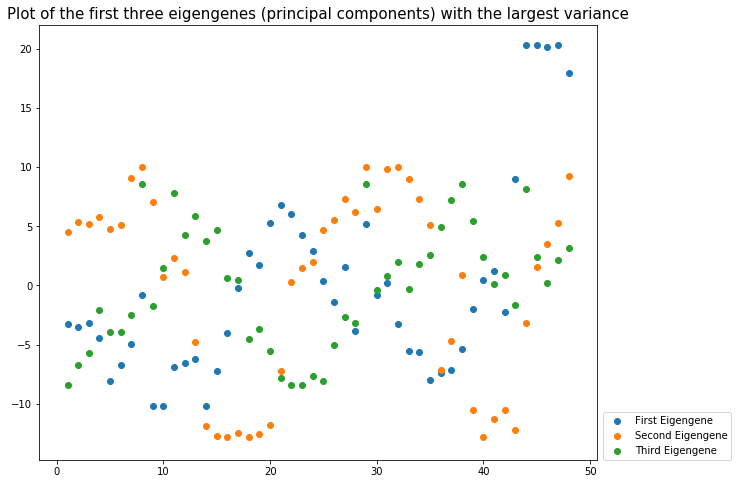

In [16]:
times = np.linspace(1,nc,nc)

eg1 = pca_eigengenes.iloc[:,0]
eg2 = pca_eigengenes.iloc[:,1]
eg3 = pca_eigengenes.iloc[:,2]

plt.figure(figsize=(10,8))
plt.scatter(times, eg1, label="First Eigengene")
plt.scatter(times, eg2, label="Second Eigengene")
plt.scatter(times, eg3, label="Third Eigengene")
plt.title('Plot of the first three eigengenes (principal components) with the largest variance', size=15)
plt.legend(loc=[1.01,0])
plt.show()

Next, plot these three eigengenes against each other:

Text(0.5, 1.0, '2nd vs 3rd')

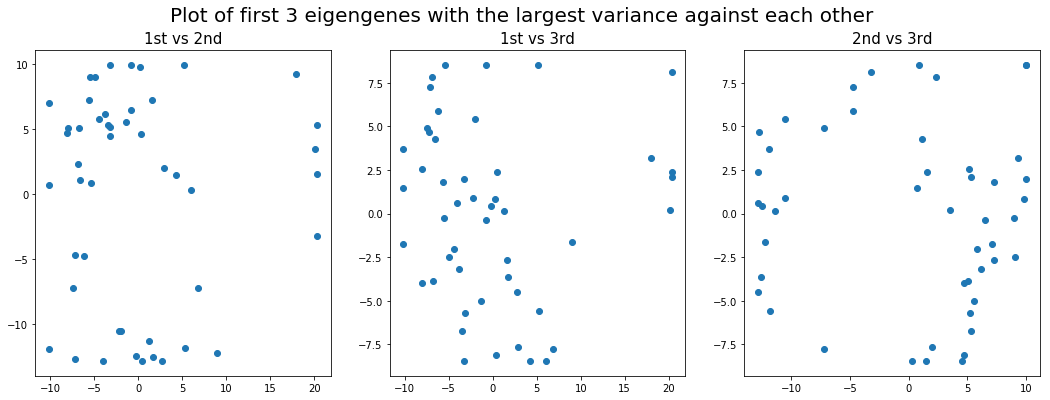

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,6))
plt.suptitle('Plot of first 3 eigengenes with the largest variance against each other', size=20)

ax1.scatter(eg1, eg2)
ax1.set_title('1st vs 2nd', size=15)
ax2.scatter(eg1, eg3)
ax2.set_title('1st vs 3rd', size=15)
ax3.scatter(eg2, eg3)
ax3.set_title('2nd vs 3rd', size=15)

## 4. Creating the autoencoder model

In [18]:
data = pca_eigengenes.to_numpy()

In [19]:
def jump_control(X):
    X_ = X.copy()
    pop_list = []
    for i in range(1,len(X)):
        if X[i]-X[i-1]<10:
            pop_list.append(i)
    pop_list.sort(reverse=True)
    for i in pop_list:
        X_.pop(i)
    return X_

def iterr(data):
    model = cyclops(data.shape[1])
    n_epochs = 500
    history = model.train(data[np.random.permutation(data.shape[0]), :], epochs=n_epochs, verbose=n_epochs, batch_size=10)
    loss = history.history['loss'][-1]
    
    phase_df = model.phase_output(data)
    phase_idx = phase_df.index.to_numpy()
    phase_list = phase_df.pseudotime.to_numpy()
    
    zipped = list(zip(phase_idx,phase_list))
    re_phase_list = np.array([sorted(zipped, key = lambda t: t[0])[i][1] for i in range(len(zipped))])
    re_phase_idx = np.array([sorted(zipped, key = lambda t: t[0])[i][0] for i in range(len(zipped))])
    
    asc_phase_jump, desc_phase_jump = [],[]
    for i in range(len(re_phase_list)-1):
        if re_phase_list[i+1]-re_phase_list[i] > np.pi:
            desc_phase_jump.append(i)
        elif re_phase_list[i+1]-re_phase_list[i] < -np.pi:
            asc_phase_jump.append(i)
            
    if len(asc_phase_jump) > len(desc_phase_jump):
        phase_jump = asc_phase_jump
    else:
        phase_jump = desc_phase_jump


    phase_jump = jump_control(phase_jump)

    jumps = len(phase_jump)
    for i in range(jumps):
        if len(asc_phase_jump) > len(desc_phase_jump):
            re_phase_list = np.array([re_phase_list[i] if i < phase_jump[0]+1 else re_phase_list[i] + 2*np.pi for i in range(len(zipped))])
        else:
            re_phase_list = np.array([re_phase_list[i] if i < phase_jump[0]+1 else re_phase_list[i] - 2*np.pi for i in range(len(zipped))])
        phase_jump.pop(0)
    
    from scipy.stats import linregress

    lin = linregress(re_phase_idx, re_phase_list)
    
    r_squared = lin[2]**2
    
    return loss, r_squared

In [20]:
%%capture
%%time

n_iter = 50

iter_list = np.zeros([n_iter,2])

for i in range(n_iter):
    iter_list[i] = iterr(data)

In [21]:
cs = np.array([iter_list[i][0] for i in range(len(iter_list))])
r2 = np.array([iter_list[i][1] for i in range(len(iter_list))])

/Users/henrylim/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


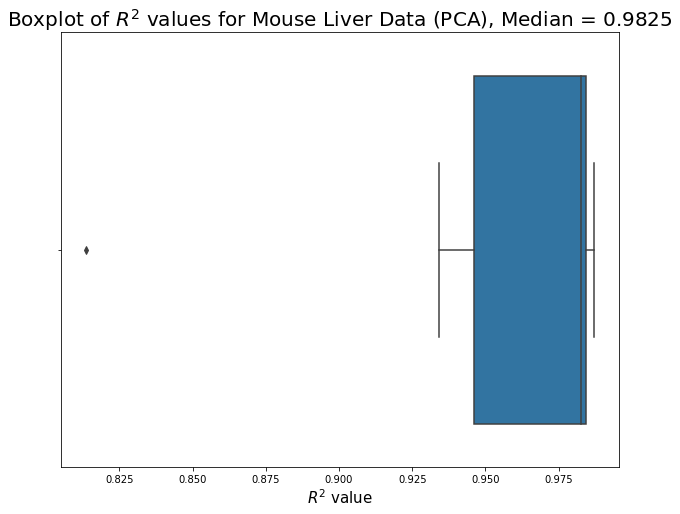

In [22]:
import seaborn as sns
import statistics

plt.figure(figsize=(10,8))
sns.boxplot(r2)
plt.xlabel(r'$R^2$ value', size=15)
plt.title(r'Boxplot of $R^2$ values for Mouse Liver Data (PCA), Median = {:.4f}'.format(statistics.median(r2)), size=20)d
plt.show()